In [1]:
import sys, os, platform



In [2]:
import pandas as pd
df = pd.read_csv("../../data/comp_data.csv")
df.head()


,timestep,INTERESTingProduct,James_Fund_007
0,0,3.500000,100.000000
1,1,3.511070,100.001203
2,2,3.524691,100.002473
3,3,3.546676,100.003916
4,4,3.565676,100.005457


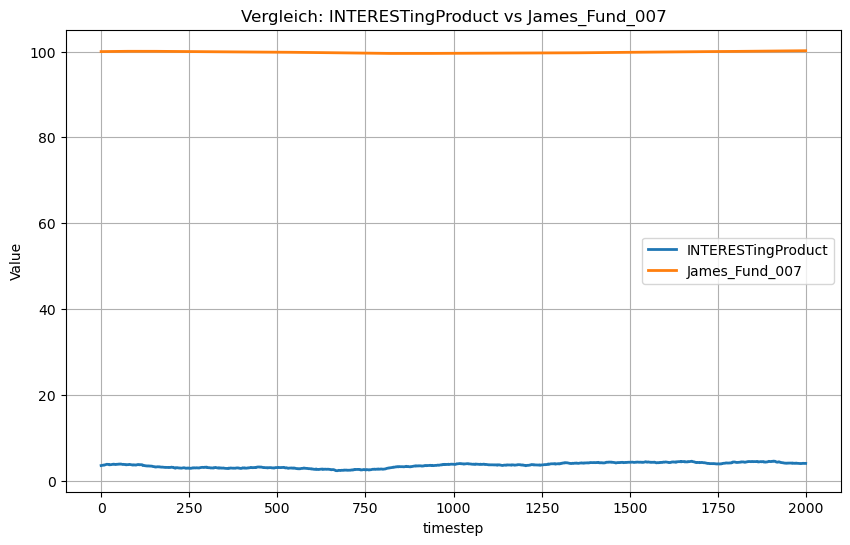

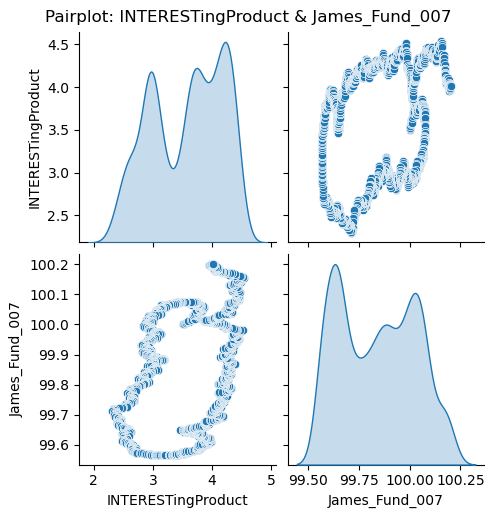

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# --- 1. Gemeinsamer Plot über timestep ---
plt.figure(figsize=(10,6))
plt.plot(df["timestep"], df["INTERESTingProduct"], label="INTERESTingProduct", linewidth=2)
plt.plot(df["timestep"], df["James_Fund_007"], label="James_Fund_007", linewidth=2)
plt.xlabel("timestep")
plt.ylabel("Value")
plt.title("Vergleich: INTERESTingProduct vs James_Fund_007")
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Pairplot (Korrelation) ---
sns.pairplot(df[["INTERESTingProduct", "James_Fund_007"]], diag_kind="kde")
plt.suptitle("Pairplot: INTERESTingProduct & James_Fund_007", y=1.02)
plt.show()


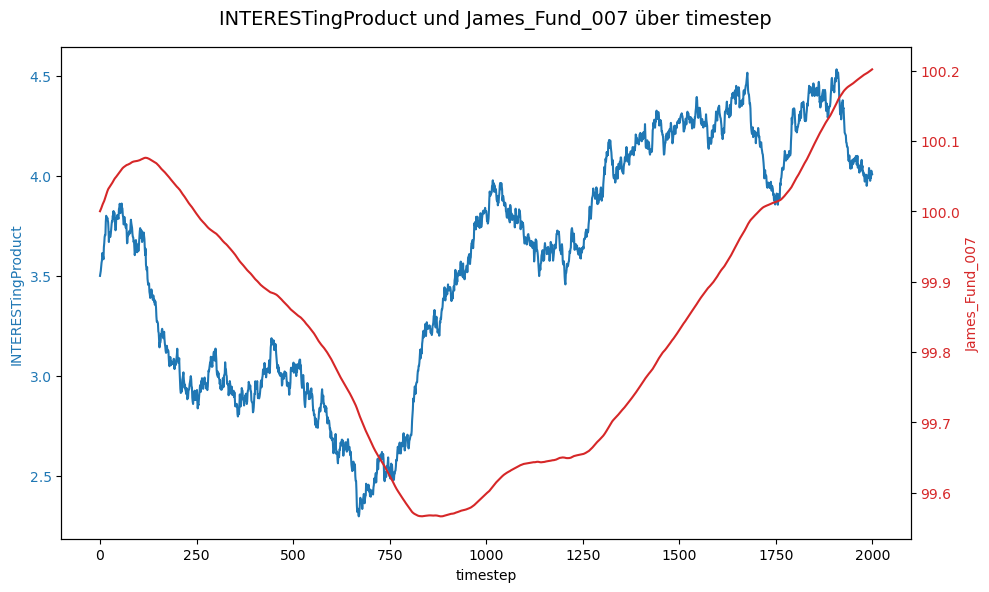

In [4]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Erste y-Achse (INTERESTingProduct)
color = "tab:blue"
ax1.set_xlabel("timestep")
ax1.set_ylabel("INTERESTingProduct", color=color)
ax1.plot(df["timestep"], df["INTERESTingProduct"], color=color, label="INTERESTingProduct")
ax1.tick_params(axis="y", labelcolor=color)

# Zweite y-Achse (James_Fund_007)
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("James_Fund_007", color=color)
ax2.plot(df["timestep"], df["James_Fund_007"], color=color, label="James_Fund_007")
ax2.tick_params(axis="y", labelcolor=color)

fig.suptitle("INTERESTingProduct und James_Fund_007 über timestep", fontsize=14)
fig.tight_layout()
plt.show()

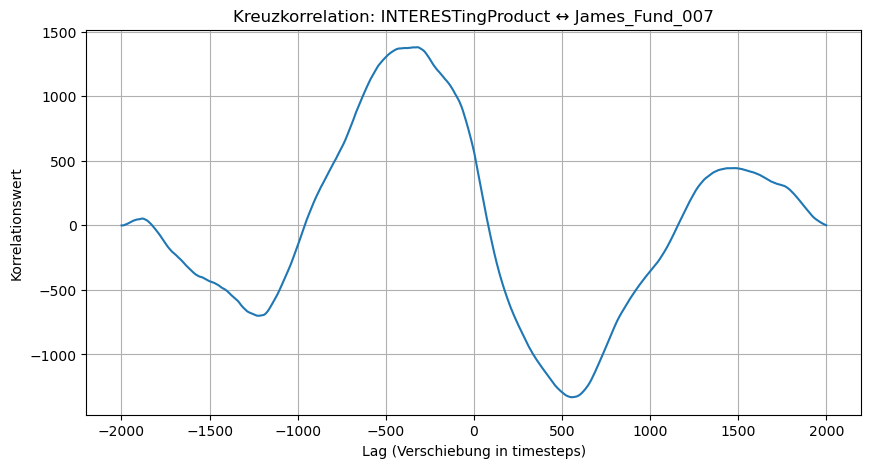

Maximale Korrelation bei Lag = -321 timesteps


In [5]:
#df = pd.read_csv("/usr/src/app/data/comp_data.csv")

# Normalisierung (damit die Größenordnungen vergleichbar sind)
x = (df["INTERESTingProduct"] - df["INTERESTingProduct"].mean()) / df["INTERESTingProduct"].std()
y = (df["James_Fund_007"] - df["James_Fund_007"].mean()) / df["James_Fund_007"].std()

# Kreuzkorrelation berechnen
corr = np.correlate(x - x.mean(), y - y.mean(), mode='full')
lags = np.arange(-len(x) + 1, len(x))

# Index des Maximums
lag_max = lags[np.argmax(corr)]

plt.figure(figsize=(10,5))
plt.plot(lags, corr)
plt.title("Kreuzkorrelation: INTERESTingProduct ↔ James_Fund_007")
plt.xlabel("Lag (Verschiebung in timesteps)")
plt.ylabel("Korrelationswert")
plt.grid(True)
plt.show()

print(f"Maximale Korrelation bei Lag = {lag_max} timesteps")

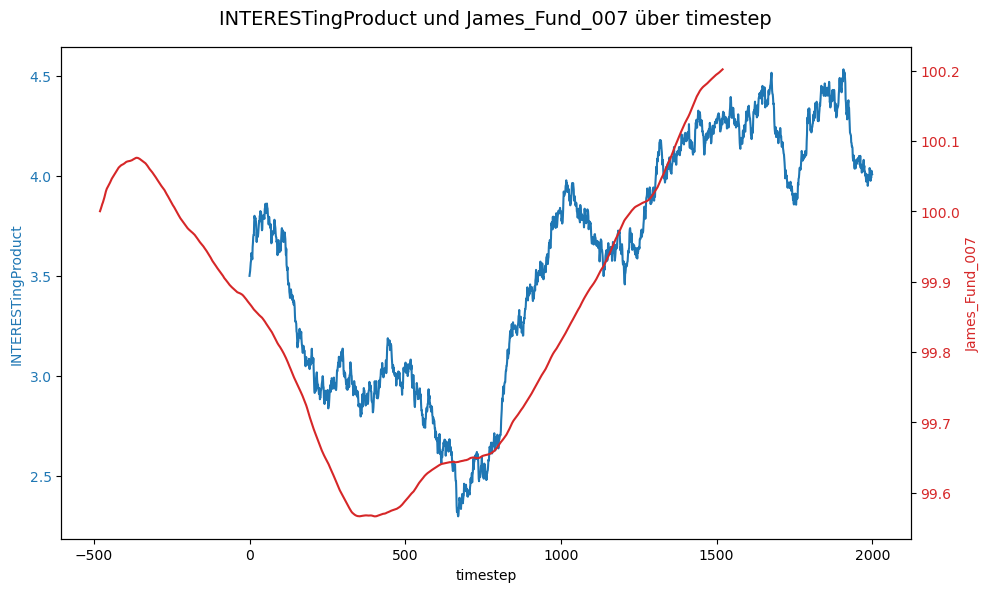

In [6]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Erste y-Achse (INTERESTingProduct)
color = "tab:blue"
ax1.set_xlabel("timestep")
ax1.set_ylabel("INTERESTingProduct", color=color)
ax1.plot(df["timestep"], df["INTERESTingProduct"], color=color, label="INTERESTingProduct")
ax1.tick_params(axis="y", labelcolor=color)

# Zweite y-Achse (James_Fund_007)
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("James_Fund_007", color=color)
ax2.plot(df["timestep"]-480, df["James_Fund_007"], color=color, label="James_Fund_007")
ax2.tick_params(axis="y", labelcolor=color)

fig.suptitle("INTERESTingProduct und James_Fund_007 über timestep", fontsize=14)
fig.tight_layout()
plt.show()

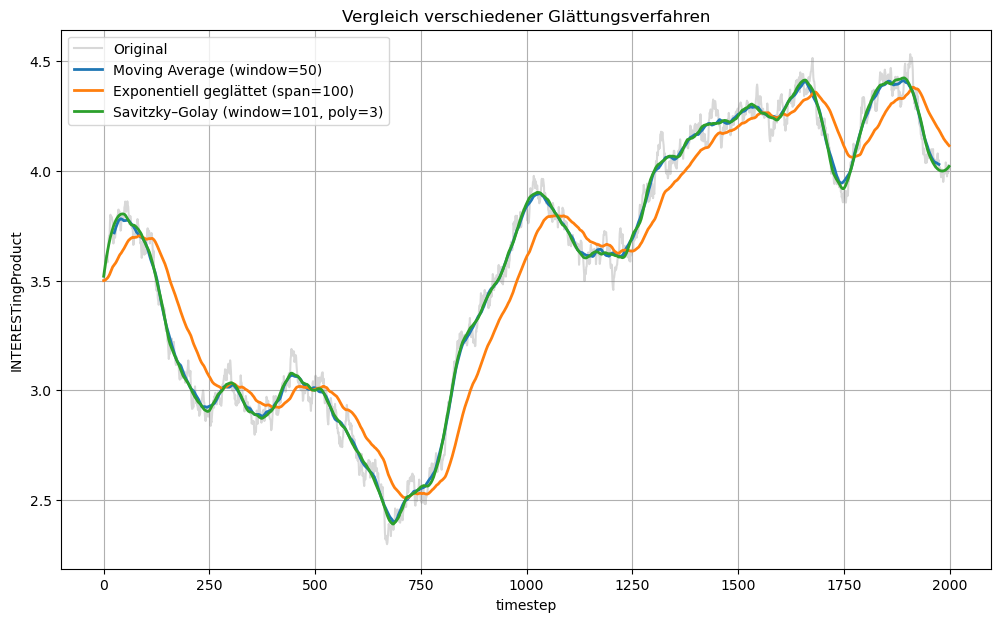

In [7]:
from scipy.signal import savgol_filter

# --- Glättung 1: Gleitender Mittelwert ---
df["interest_ma"] = df["INTERESTingProduct"].rolling(window=50, center=True).mean()

# --- Glättung 2: Exponentielles Glätten (EWMA) ---
df["interest_ewm"] = df["INTERESTingProduct"].ewm(span=100, adjust=False).mean()

# --- Glättung 3: Savitzky–Golay-Filter ---
df["interest_savgol"] = savgol_filter(df["INTERESTingProduct"], window_length=101, polyorder=3)

# --- Plot ---
plt.figure(figsize=(12,7))
plt.plot(df["timestep"], df["INTERESTingProduct"], alpha=0.3, label="Original", color="gray")
plt.plot(df["timestep"], df["interest_ma"], label="Moving Average (window=50)", linewidth=2)
plt.plot(df["timestep"], df["interest_ewm"], label="Exponentiell geglättet (span=100)", linewidth=2)
plt.plot(df["timestep"], df["interest_savgol"], label="Savitzky–Golay (window=101, poly=3)", linewidth=2)

plt.xlabel("timestep")
plt.ylabel("INTERESTingProduct")
plt.title("Vergleich verschiedener Glättungsverfahren")
plt.legend()
plt.grid(True)
plt.show()

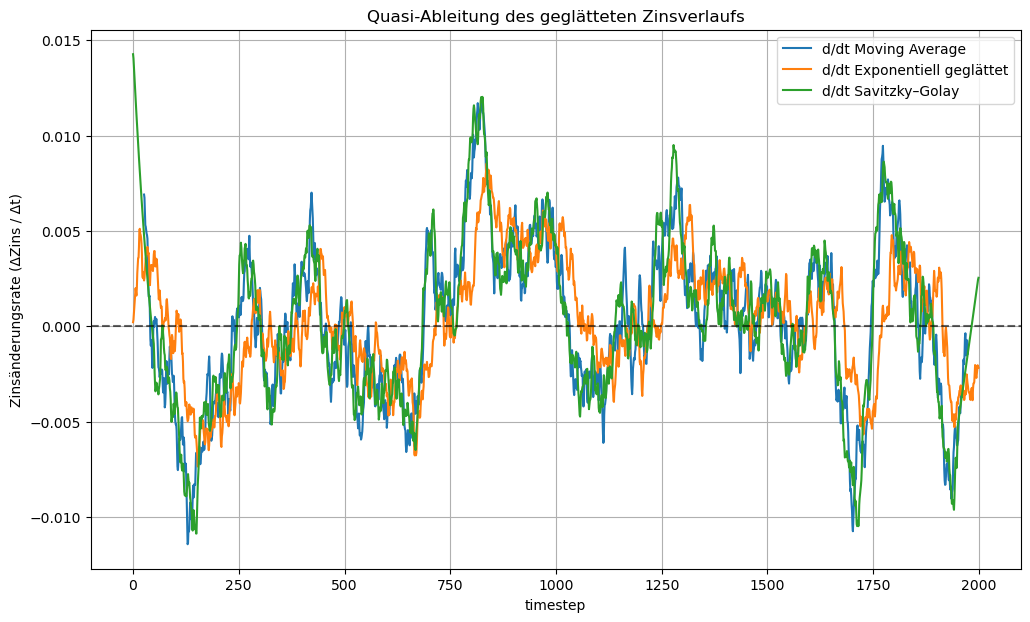

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

# Daten laden
#df = pd.read_csv("/usr/src/app/data/comp_data.csv")

# Glättungen
df["interest_ma"] = df["INTERESTingProduct"].rolling(window=50, center=True).mean()
df["interest_ewm"] = df["INTERESTingProduct"].ewm(span=100, adjust=False).mean()
df["interest_savgol"] = savgol_filter(df["INTERESTingProduct"], window_length=101, polyorder=3)

# --- Quasi-Ableitungen (numerische Differenzen) ---
df["d_ma"] = np.gradient(df["interest_ma"])
df["d_ewm"] = np.gradient(df["interest_ewm"])
df["d_savgol"] = np.gradient(df["interest_savgol"])

# --- Plot ---
plt.figure(figsize=(12,7))
plt.plot(df["timestep"], df["d_ma"], label="d/dt Moving Average", linewidth=1.5)
plt.plot(df["timestep"], df["d_ewm"], label="d/dt Exponentiell geglättet", linewidth=1.5)
plt.plot(df["timestep"], df["d_savgol"], label="d/dt Savitzky–Golay", linewidth=1.5)
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.xlabel("timestep")
plt.ylabel("Zinsänderungsrate (ΔZins / Δt)")
plt.title("Quasi-Ableitung des geglätteten Zinsverlaufs")
plt.legend()
plt.grid(True)
plt.show()


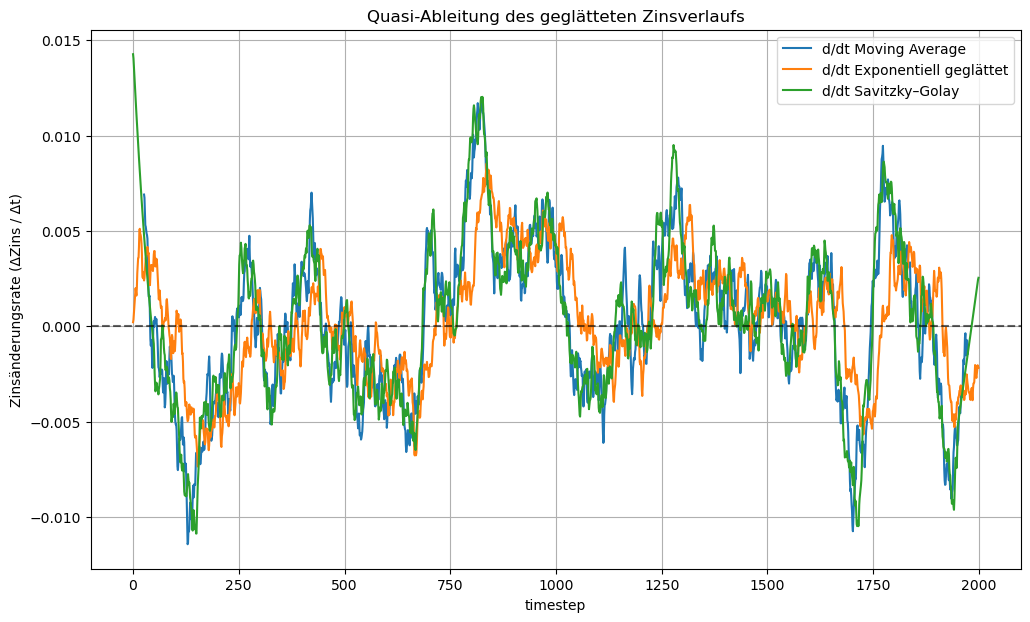

In [9]:
plt.figure(figsize=(12,7))
plt.plot(df["timestep"], df["d_ma"], label="d/dt Moving Average", linewidth=1.5)
plt.plot(df["timestep"], df["d_ewm"], label="d/dt Exponentiell geglättet", linewidth=1.5)
plt.plot(df["timestep"], df["d_savgol"], label="d/dt Savitzky–Golay", linewidth=1.5)
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.xlabel("timestep")
plt.ylabel("Zinsänderungsrate (ΔZins / Δt)")
plt.title("Quasi-Ableitung des geglätteten Zinsverlaufs")
plt.legend()
plt.grid(True)
plt.show()

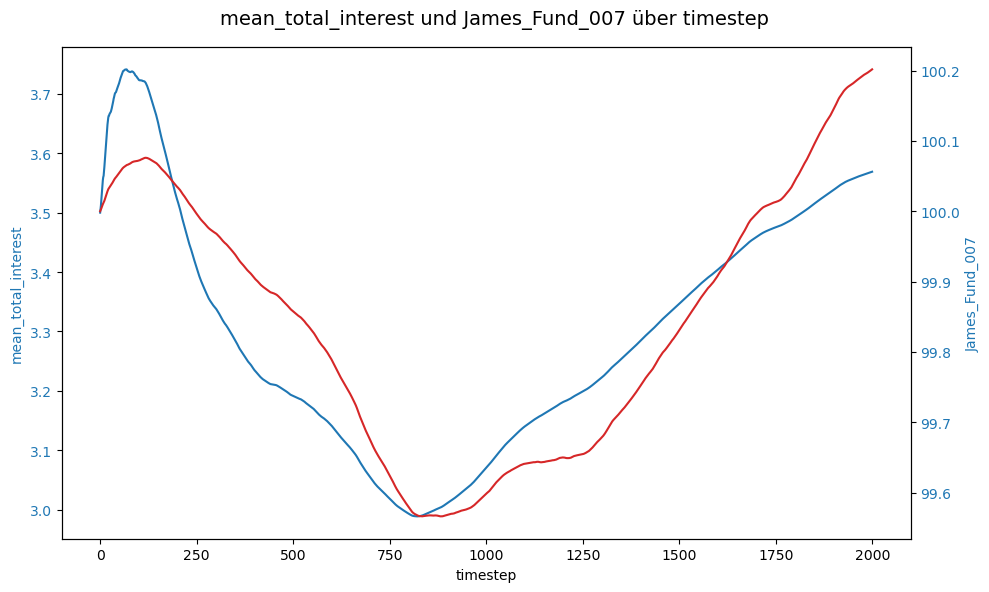

In [10]:
df["mean_interest"] = df["INTERESTingProduct"].expanding().mean()

fig, ax1 = plt.subplots(figsize=(10,6))


color = "tab:blue"
ax1.set_xlabel("timestep")
ax1.set_ylabel("mean_total_interest", color=color)
ax1.plot(df["timestep"], df["mean_interest"], color=color, label="mean_total_interest")
ax1.tick_params(axis="y", labelcolor=color)


ax2 = ax1.twinx()
color2 = "tab:red"
color3 = "tab:green"
ax2.set_ylabel("James_Fund_007", color=color)
ax2.plot(df["timestep"], df["James_Fund_007"], color=color2, label="fund")
#ax2.plot(df["timestep"], np.exp((4.57616)+(0.008306*df["mean_interest"])+(2e-8)*df["timestep"]), color=color3, label="pred_fund")
ax2.tick_params(axis="y", labelcolor=color)

fig.suptitle("mean_total_interest und James_Fund_007 über timestep", fontsize=14)
fig.tight_layout()
#plt.legend()
plt.show()


In [11]:
corr = df["mean_interest"].corr(df["James_Fund_007"], method="pearson")
print(f"Korrelationskoeffizient (Pearson): {corr:.4f}")
corr2 = df["mean_interest"].corr(df["James_Fund_007"], method="spearman")
print(f"Korrelationskoeffizient (Spearman): {corr2:.4f}")


Korrelationskoeffizient (Pearson): 0.9091
Korrelationskoeffizient (Spearman): 0.9359


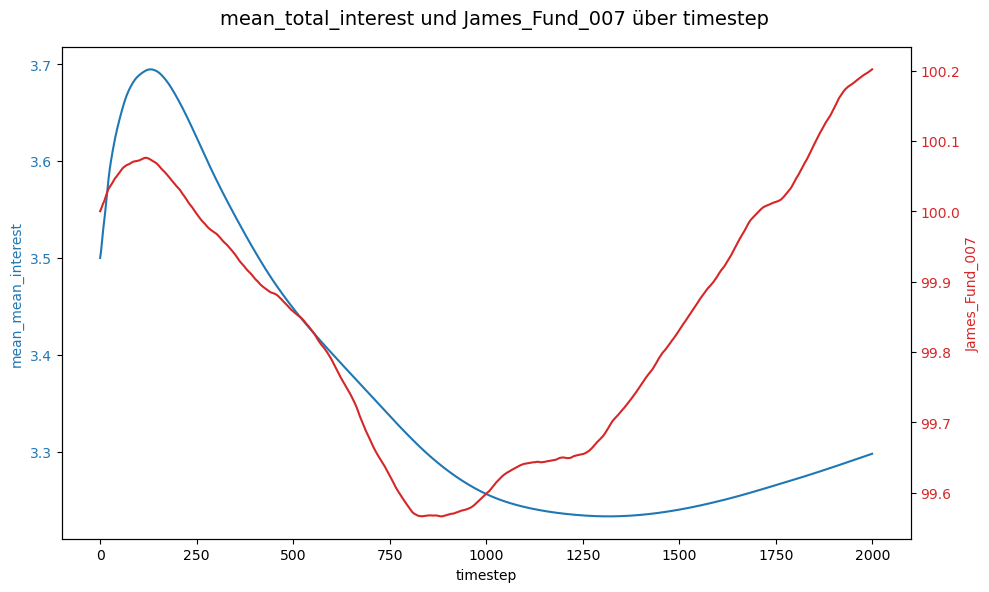

In [12]:
df["mean_mean_interest"] = df["mean_interest"].expanding().mean()

fig, ax1 = plt.subplots(figsize=(10,6))


color = "tab:blue"
ax1.set_xlabel("timestep")
ax1.set_ylabel("mean_mean_interest", color=color)
ax1.plot(df["timestep"], df["mean_mean_interest"], color=color, label="mean_mean_interest")
ax1.tick_params(axis="y", labelcolor=color)


ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("James_Fund_007", color=color)
ax2.plot(df["timestep"], df["James_Fund_007"], color=color, label="mean_total_interest")
ax2.tick_params(axis="y", labelcolor=color)

fig.suptitle("mean_total_interest und James_Fund_007 über timestep", fontsize=14)
fig.tight_layout()
plt.show()

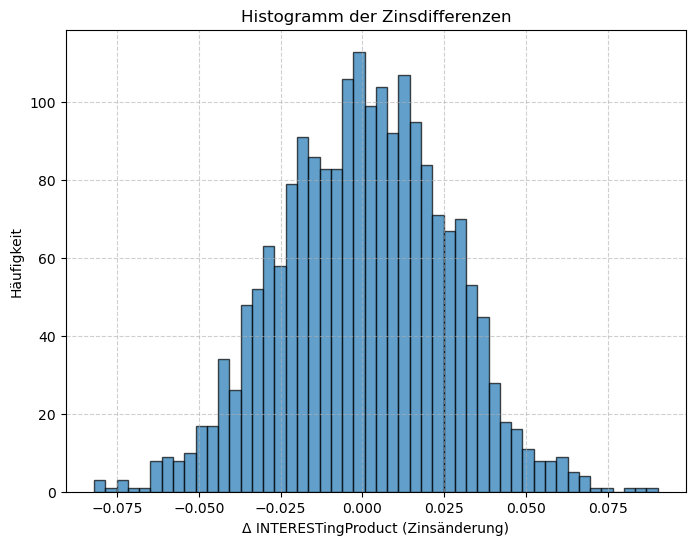

⟨ΔZins⟩ = 0.000254
σ(ΔZins) = 0.025549


In [13]:
df["interest_diff"] = df["INTERESTingProduct"].diff()

# Histogramm plotten
plt.figure(figsize=(8,6))
plt.hist(df["interest_diff"].dropna(), bins=50, color="tab:blue", edgecolor="black", alpha=0.7)
plt.xlabel("Δ INTERESTingProduct (Zinsänderung)")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Zinsdifferenzen")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

mean_diff = df["interest_diff"].mean()
std_diff = df["interest_diff"].std()

print(f"⟨ΔZins⟩ = {mean_diff:.6f}")
print(f"σ(ΔZins) = {std_diff:.6f}")

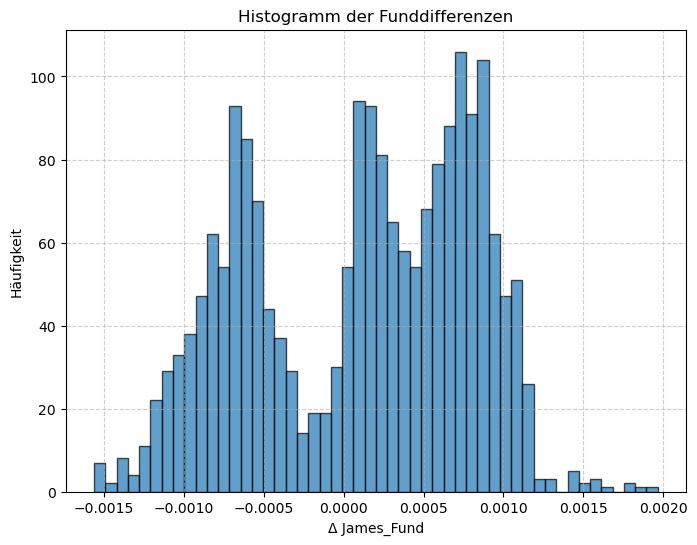

⟨ΔFund⟩ = 0.000101
σ(ΔFund) = 0.000692


In [14]:
df["fund_diff"] = df["James_Fund_007"].diff()

# Histogramm plotten
plt.figure(figsize=(8,6))
plt.hist(df["fund_diff"].dropna(), bins=50, color="tab:blue", edgecolor="black", alpha=0.7)
plt.xlabel("Δ James_Fund")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Funddifferenzen")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

mean_diff = df["fund_diff"].mean()
std_diff = df["fund_diff"].std()

print(f"⟨ΔFund⟩ = {mean_diff:.6f}")
print(f"σ(ΔFund) = {std_diff:.6f}")

In [15]:
import numpy as np
import pandas as pd

# Daten laden
#df = pd.read_csv("/usr/src/app/data/comp_data.csv")
df["mean_total_interest"] = df["INTERESTingProduct"].expanding().mean()
df["log_fund"] = np.log(df["James_Fund_007"])

# Variablen vorbereiten
X = np.column_stack([
    np.ones(len(df)),                    # Konstante (Intercept)
    df["mean_total_interest"].to_numpy(),# Zinsabhängigkeit
    df["timestep"].to_numpy()            # Zeittrend
])
y = df["log_fund"].to_numpy()

# NaN entfernen
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Regressionskoeffizienten berechnen (Least Squares)
beta, *_ = np.linalg.lstsq(X, y, rcond=None)

# Vorhersage und Güte
y_pred = X @ beta
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print("Koeffizienten:")
print(f"Intercept:            {beta[0]:.6f}")
print(f"mean_total_interest:  {beta[1]:.6f}")
print(f"timestep:             {beta[2]:.6e}")
print(f"R²:                   {r2:.4f}")


Koeffizienten:
Intercept:            4.576160
mean_total_interest:  0.008306
timestep:             1.966496e-08
R²:                   0.8265


In [16]:
class Trader:
    def __init__(self, window=100):
        self.window = window
        self.history = []

    def on_quote(self, market, portfolio):
        quote_interest = market.quotes["INTERESTingProduct"]
        quote_fund = market.quotes["James_Fund_007"]

        # aktuellen Zins speichern
        self.history.append(quote_interest)

        if len(self.history) > self.window:
            df = pd.Series(self.history)
            mean_total_interest = df.expanding().mean().iloc[-1]
            rolling_mean_interest = df.rolling(window=self.window).mean().iloc[-1]

            if mean_total_interest > rolling_mean_interest:
                portfolio.buy("James_Fund_007", quantity=100)
            else:
                portfolio.sell("James_Fund_007", quantity=100)

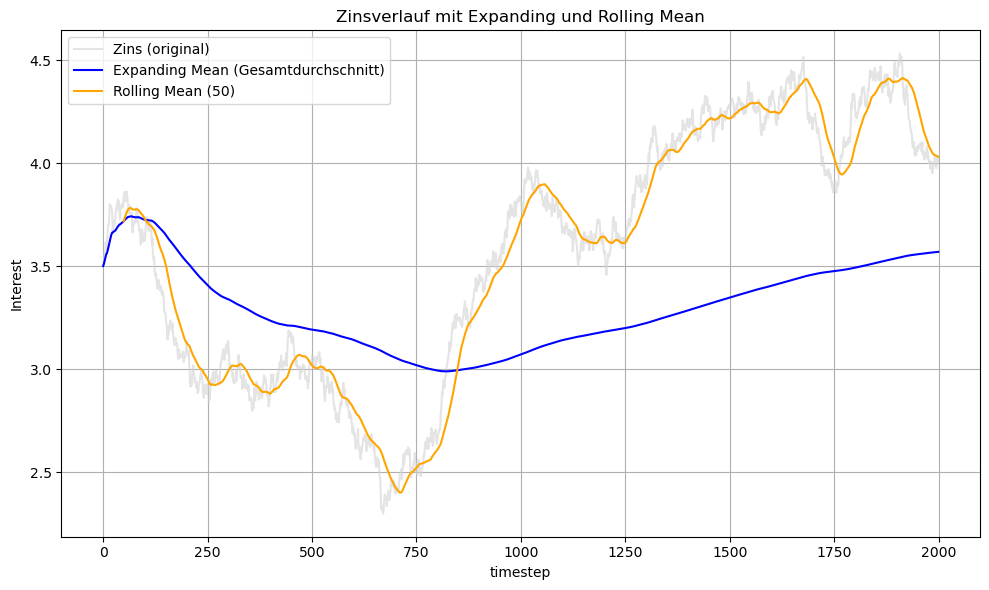

In [17]:
import pandas as pd
import matplotlib.pyplot as plt



window = 50  

df["mean_total_interest"] = df["INTERESTingProduct"].expanding().mean()
df["rolling_mean_interest"] = df["INTERESTingProduct"].rolling(window=window).mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(df["timestep"], df["INTERESTingProduct"], color="lightgray", alpha=0.6, label="Zins (original)")
plt.plot(df["timestep"], df["mean_total_interest"], color="blue", label="Expanding Mean (Gesamtdurchschnitt)")
plt.plot(df["timestep"], df["rolling_mean_interest"], color="orange", label=f"Rolling Mean ({window})")
plt.title("Zinsverlauf mit Expanding und Rolling Mean")
plt.xlabel("timestep")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


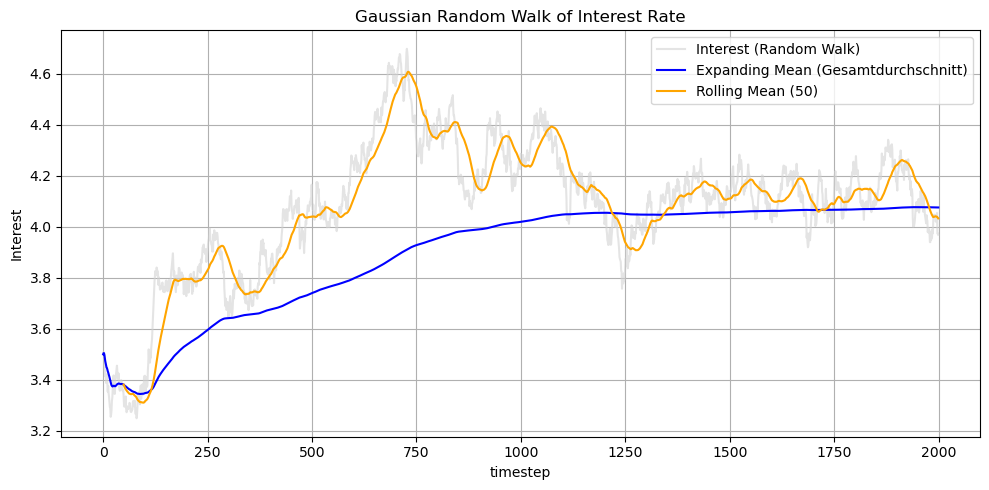

ΔZins Mittelwert: 0.000243
ΔZins σ: 0.025234


In [18]:
# --- Parameter ---
T = 2000            # Anzahl Zeitschritte
r0 = 3.5            # Startwert
mu = 0.0            # Erwartungswert der Schritte (ΔZins)
sigma = 0.025549    # Standardabweichung der Schritte (ΔZins)

# --- Random Walk erzeugen ---
#np.random.seed(42)  # für Reproduzierbarkeit
steps = np.random.normal(loc=mu, scale=sigma, size=T)  # Gauß-verteilte Schritte ΔZins
r = np.zeros(T)
r[0] = r0
for t in range(1, T):
    r[t] = r[t-1] + steps[t]   # Random-Walk-Summe

# --- In DataFrame packen ---
df2 = pd.DataFrame({
    "timestep": np.arange(T),
    "interest": r,
    "delta_interest": steps
})
window = 50  # kannst du anpassen

df2["mean_total_interest"] = df2["interest"].expanding().mean()
df2["rolling_mean_interest"] = df2["interest"].rolling(window=window).mean()
# --- Plot (optional) ---
plt.figure(figsize=(10,5))
plt.plot(df2["timestep"], df2["interest"],color="lightgray", alpha=0.6, label="Interest (Random Walk)")
plt.plot(df2["timestep"], df2["mean_total_interest"], color="blue", label="Expanding Mean (Gesamtdurchschnitt)")
plt.plot(df2["timestep"], df2["rolling_mean_interest"], color="orange", label=f"Rolling Mean ({window})")
plt.title("Gaussian Random Walk of Interest Rate")
plt.xlabel("timestep")
plt.ylabel("Interest")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Kontrolle ---
print(f"ΔZins Mittelwert: {df2['delta_interest'].mean():.6f}")
print(f"ΔZins σ: {df2['delta_interest'].std():.6f}")

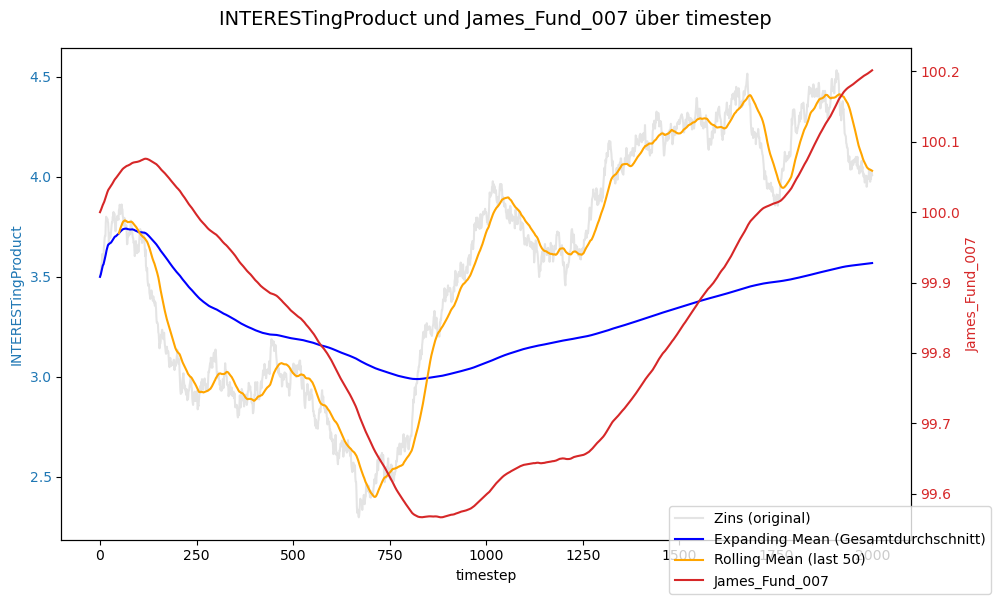

In [19]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Erste y-Achse (INTERESTingProduct)
color = "tab:blue"
ax1.set_xlabel("timestep")
ax1.set_ylabel("INTERESTingProduct", color=color)
ax1.plot(df["timestep"], df["INTERESTingProduct"], color="lightgray", alpha=0.6, label="Interest (original)")
ax1.plot(df["timestep"], df["mean_total_interest"], color="blue", label="Expanding Mean (Gesamtdurchschnitt)")
ax1.plot(df["timestep"], df["rolling_mean_interest"], color="orange", label=f"Rolling Mean (last {window})")
ax1.tick_params(axis="y", labelcolor=color)

# Zweite y-Achse (James_Fund_007)
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("James_Fund_007", color=color)
ax2.plot(df["timestep"], df["James_Fund_007"], color=color, label="James_Fund_007")
ax2.tick_params(axis="y", labelcolor=color)

fig.suptitle("INTERESTingProduct und James_Fund_007 über timestep", fontsize=14)
fig.tight_layout()
fig.legend(loc="lower right")
plt.show()